In [ ]:
!wget https://img.freepik.com/foto-gratis/primer-disparo-flor-morada_181624-25863.jpg

--2024-06-01 11:46:55--  https://img.freepik.com/foto-gratis/primer-disparo-flor-morada_181624-25863.jpg
Resolving img.freepik.com (img.freepik.com)... 184.26.127.9, 184.26.127.33, 2600:1417:76::6874:f311, ...
Connecting to img.freepik.com (img.freepik.com)|184.26.127.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65493 (64K) [image/jpeg]
Saving to: ‘primer-disparo-flor-morada_181624-25863.jpg’

primer-disparo-flor 100%[===================>]  63.96K  54.0KB/s    in 1.2s    

2024-06-01 11:47:00 (54.0 KB/s) - ‘primer-disparo-flor-morada_181624-25863.jpg’ saved [65493/65493]



In [ ]:
#manipulacion de matrices
import numpy as np
#manipulacion de dataframe
import pandas as pd
#visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
#manipulacion de imagenes
import cv2
from google.colab.patches import cv2_imshow




**Adquisición de datos**

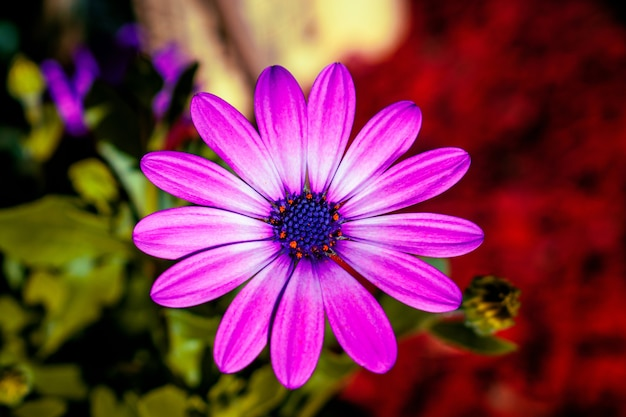

In [ ]:
imagen=cv2.imread("primer-disparo-flor-morada_181624-25863.jpg")
cv2_imshow(imagen)
plt.show()

In [ ]:
pixel_values=imagen.reshape((-1,3))
datos=pd.DataFrame(pixel_values,columns=['Red','Green','Blue'])
pixel_values = np.float32(pixel_values)
datos.head(20)


,Red,Green,Blue
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [ ]:
print(len(datos))

261042


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261042 entries, 0 to 261041
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Red     261042 non-null  uint8
 1   Green   261042 non-null  uint8
 2   Blue    261042 non-null  uint8
dtypes: uint8(3)
memory usage: 764.9 KB


In [ ]:
datos.describe()

,Red,Green,Blue
count,261042.00000,261042.000000,261042.000000
mean,73.07613,51.095261,122.681971
std,97.31429,61.155375,81.409078
min,0.00000,0.000000,0.000000
25%,2.00000,2.000000,61.000000
50%,7.00000,22.000000,107.000000
75%,157.00000,89.000000,209.000000
max,255.00000,250.000000,255.000000


In [ ]:
datos['Pixel'] = list(zip(datos['Red'], datos['Green'], datos['Blue']))

# Contar la frecuencia de cada píxel
frecuencias = datos['Pixel'].value_counts()

# Mostrar los píxeles más frecuentes
print("Los 10 píxeles más frecuentes:")
print(frecuencias.head(10))

Los 10 píxeles más frecuentes:
Pixel
(0, 0, 0)     3140
(1, 1, 1)     2251
(1, 2, 0)      468
(0, 3, 1)      463
(0, 1, 0)      455
(3, 1, 60)     432
(0, 2, 0)      417
(2, 1, 63)     416
(3, 1, 67)     409
(3, 1, 61)     372
Name: count, dtype: int64


In [ ]:
pixel_values = np.float32(pixel_values)
pixel_red=datos["Red"]
pixel_green=datos["Green"]
pixel_blue=datos["Blue"]

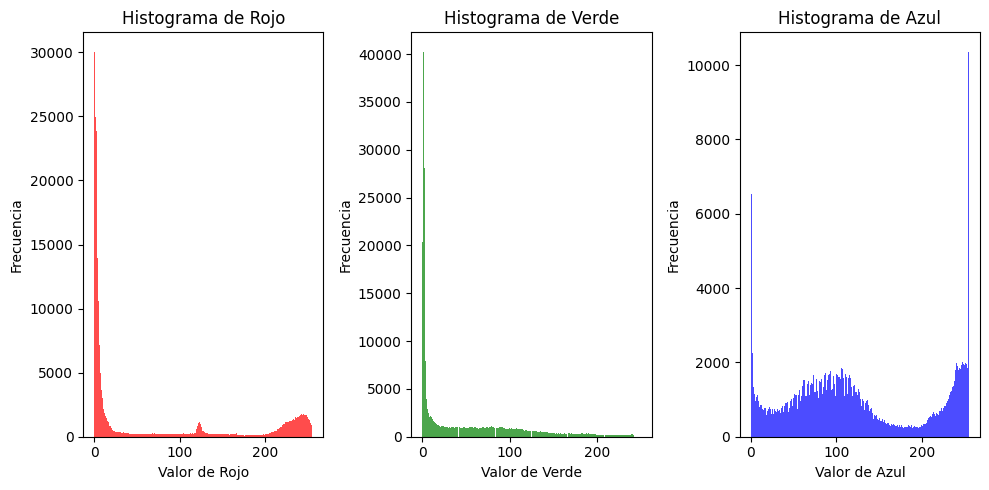

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(pixel_red, bins=256, color='red', alpha=0.7)
plt.title('Histograma de Rojo')
plt.xlabel('Valor de Rojo')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(pixel_green, bins=256, color='green', alpha=0.7)
plt.title('Histograma de Verde')
plt.xlabel('Valor de Verde')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(pixel_blue, bins=256, color='blue', alpha=0.7)
plt.title('Histograma de Azul')
plt.xlabel('Valor de Azul')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

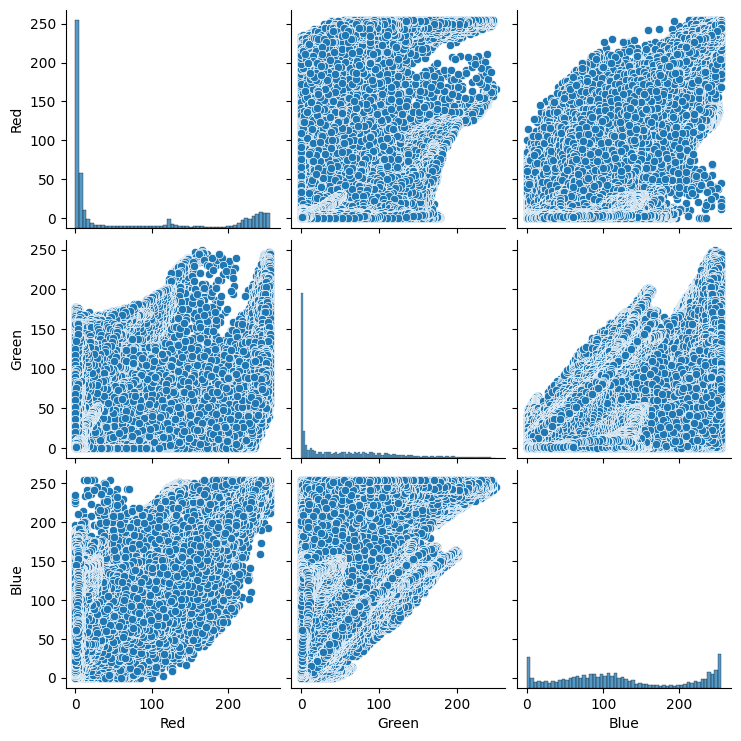

In [ ]:
sns.pairplot(datos)

<Axes: >

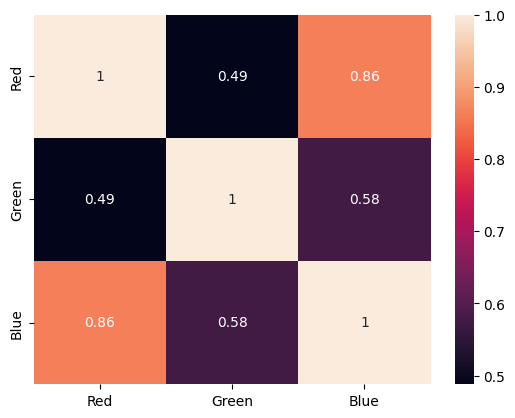

In [ ]:
canales_rgb=datos.drop(['Pixel'],axis=1)
sns.heatmap(canales_rgb.corr(), annot=True)

<ipython-input-22-83f63ad9d035>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=canales_rgb[column], palette='Set3')


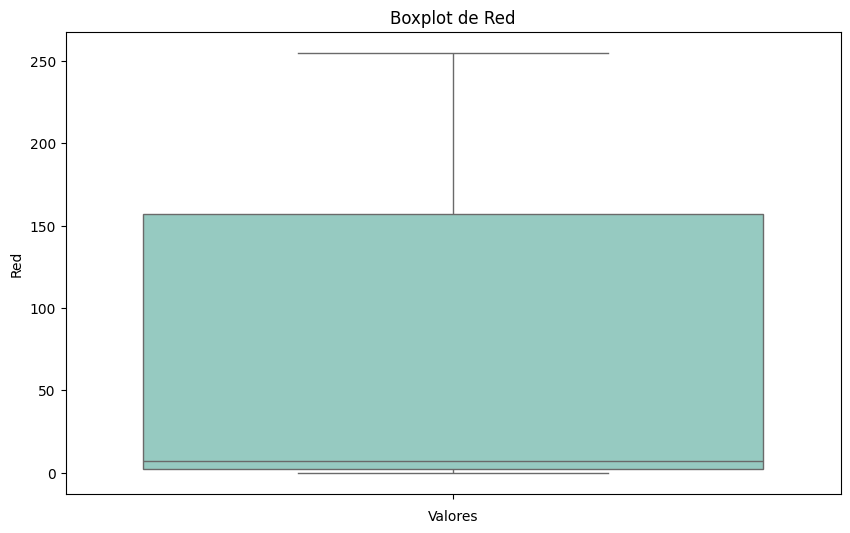

<ipython-input-22-83f63ad9d035>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=canales_rgb[column], palette='Set3')


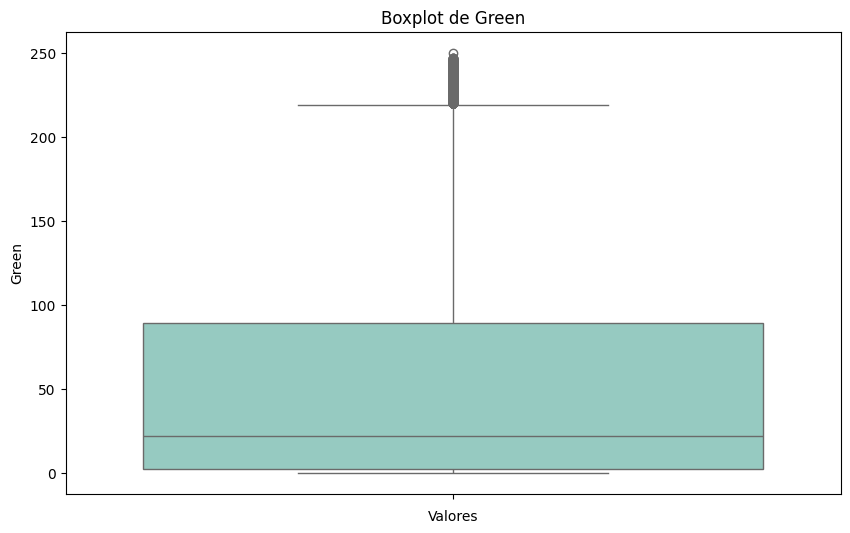

<ipython-input-22-83f63ad9d035>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=canales_rgb[column], palette='Set3')


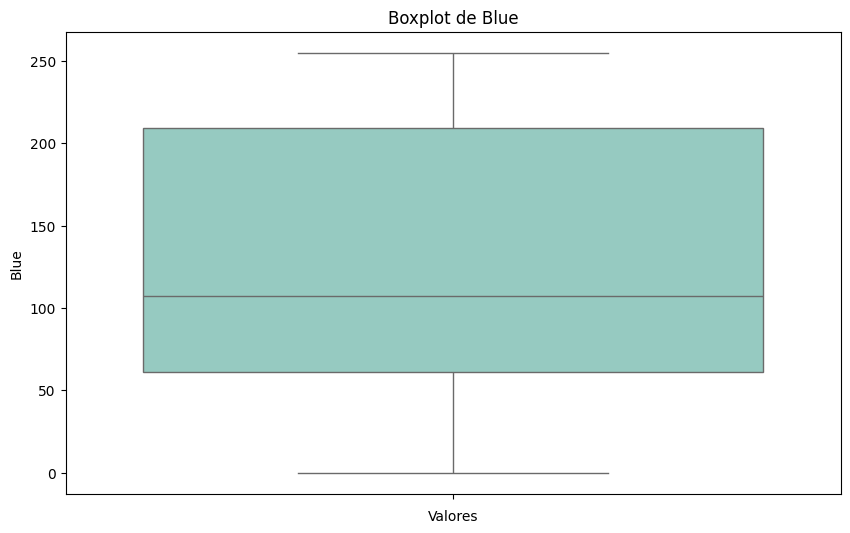

In [ ]:
for column in canales_rgb.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=canales_rgb[column], palette='Set3')
    plt.title(f'Boxplot de {column}')
    plt.xlabel('Valores')
    plt.ylabel(column)
    plt.show()

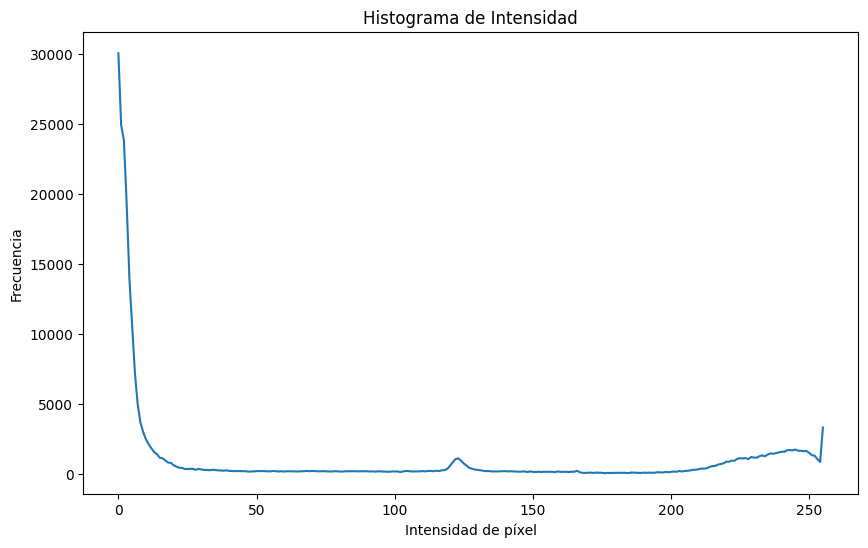

In [ ]:
hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])

# Mostrar el histograma
plt.figure(figsize=(10, 6))
plt.plot(hist)
plt.title('Histograma de Intensidad')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.show()

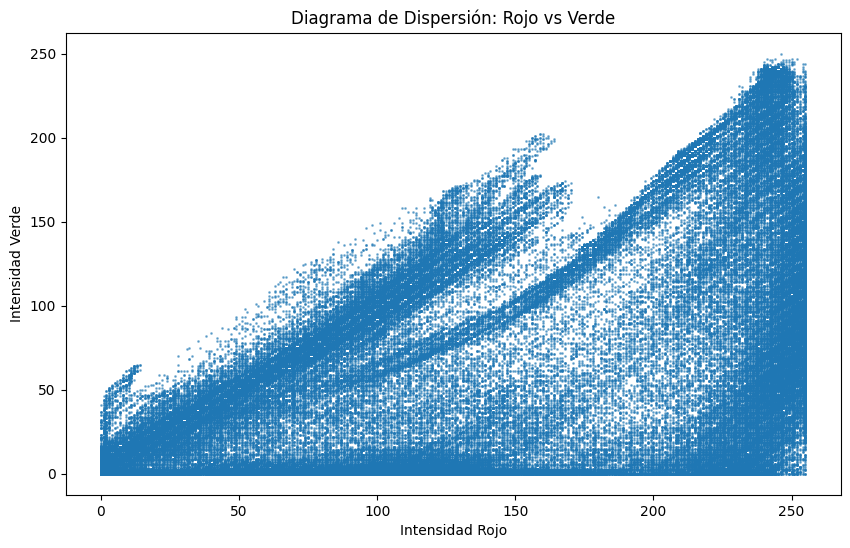

In [ ]:
image_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Extraer los canales rojo y verde
red = image_rgb[:, :, 0].flatten()
green = image_rgb[:, :, 1].flatten()

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(red, green, alpha=0.5, s=1)
plt.title('Diagrama de Dispersión: Rojo vs Verde')
plt.xlabel('Intensidad Rojo')
plt.ylabel('Intensidad Verde')
plt.show()

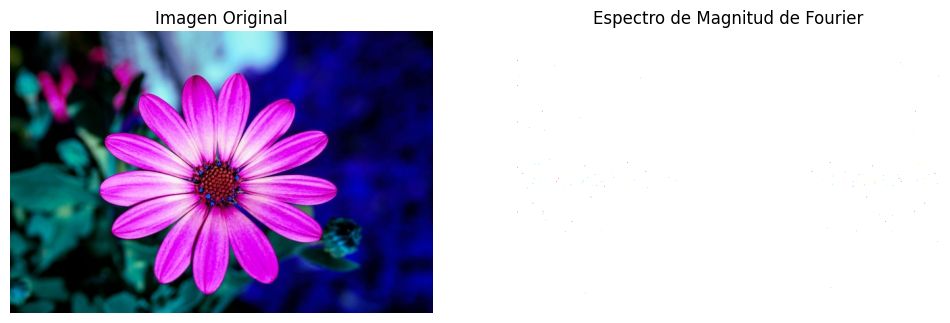

In [32]:
fourier = np.fft.fft2(imagen)
fourier_shifted = np.fft.fftshift(fourier)
magnitude_spectrum = 20 * np.log(np.abs(fourier_shifted))

# Paso 3: Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de Magnitud de Fourier')
plt.axis('off')

plt.show()